# Parametric Estimation
### Notes by Terrence Alsup

In [1]:
# Import packages needed.
import numpy as np
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plt

# Parametric Models

A central problem in statistics is determining properties of a population $f$ from a sample of data $x_1,\ldots,x_n \sim f$.  For example, we might be interested in the mean of the population which we estimate by the sample mean.

$$
    E[X] \approx \overline{x}
$$

This type of estimate is a non-parametric estimate because it holds for *nearly* any type of distribution $f$.  

Sometimes, however, the data follows certain patterns or comes from some data generating process which can be modeled by a parameter $\theta$, which is unknown to us.  This means we can restrict our search when finding which distribution the data belongs to.  In particular, we now only need to find the parameter $\theta$, which completely determines the distribution $f(x;\theta)$ out of some parametric family.


Here are some examples:

1. Normal distribution with unknown variance: $N(0,\sigma^2)$.  This is often used to model noise in observations or errors.

2. Exponential distribution Exponential($\lambda$) can be used to represent wait times for events where $\lambda$ is the rate at which an event occurs.

3. Bernoulli($p$) to model a binary outcome such as flipping a weighted coin.

# Sampling distributions of estimators

Two of the most common estimators are the sample mean $\overline{X}$ and the sample standard deviation $S$.  Every good estimator depends on the data $X_1,\ldots,X_n$ that's observed.  Because the data is modeled as random variables, the estimator will also be a random variable depending on the values of the data.

**This means that estimators have a distribution**

Below is an example of the distribution of the sample mean $\bar{X}$, where $X_1,\ldots,X_{8}$ come from a Rayleigh distribution.

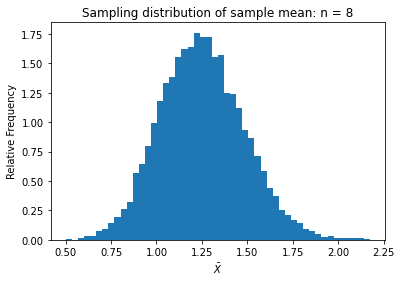

In [2]:
m = 10000 # How many times to repeat this.
n = 8    # The actual sample size n.
X = stats.rayleigh.rvs(size = m*n).reshape((m,n)) # Draw the samples.
Xbar = np.mean(X, axis = 1) # Compute the means for each trial.

# Plot results.
plt.figure()
plt.hist(Xbar, density = True, bins = 50)
plt.xlabel(r'$\bar{X}$')
plt.ylabel(r'Relative Frequency')
plt.title(r'Sampling distribution of sample mean: n = {:d}'.format(n));

In the example above we computed the sample mean (with only $n=8$ samples) 10,000 different times based on 10,000 different samples of data.  Each time we get a different result because the data is random.  We can think of each of these trials as happening in a separate universe.  The distribution of all of these different results gives the sampling distribution of the estimator.

# Properties of estimators

Generally we hope that our estimators are good and that they actually estimate the unknown parameter $\theta$ or other quantity that they're supposed to.  The properties of an estimator are determined by their sampling distribution.  Here are some desirable properties that we would like the sampling distribution of an estimator to satisfy...

## Consistent  
An estimator $\hat{\theta}$ is consistent if $\hat{\theta} \to \theta$ in probability as $n\to \infty$.  This just means that our estimator gets better the more data we add and that given enough data it will closely approximate the true unknown value.  A lot of estimators are consistent by the law of large numbers.  

In the example below suppose we have a stream of data $U_1,\ldots,U_n,\ldots \sim $ Uniform$(0,\theta)$ and we want to estimate $\theta$.  One choice of estimator is to take $\hat{\theta} = \max_{i\le n}U_i$. This estimator is consistent as we can see in the simulation below where the true value is $\theta = 1$.

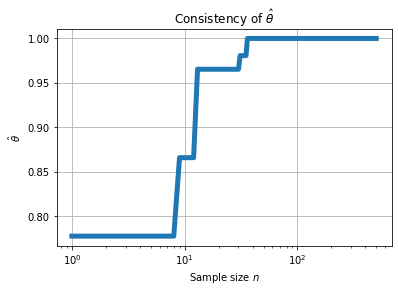

In [6]:
nmax = 500 # The largest sample size to consider.
U = np.random.rand(nmax) # The uniform rv's
theta_hat = np.maximum.accumulate(U) # The running maximum and estimate of theta

# Plot the results
plt.figure()
plt.semilogx(np.arange(1,nmax+1), theta_hat, lw=5)
plt.xlabel(r'Sample size $n$')
plt.ylabel(r'$\hat{\theta}$')
plt.grid()
plt.title(r'Consistency of $\hat{\theta}$');

## Bias

An estimator $\hat{\theta}$ of $\theta$ is unbiased if $E[\hat{\theta}] = \theta$.  In other words, the mean of the sampling distribution of an unbiased estimator is the true value $\theta$.  This is not very helpful if we just have one estimate $\hat{\theta}$ as is often the case, but if we have lots of estimates $\hat{\theta}^{(1)},\ldots,\hat{\theta}^{(m)}$, then the average of these estimates should be $\theta$.  

Here are two useful facts, which we can actually observe

1. The sample variance $S^2$ is an unbiased estimator of $\sigma^2$

2. The sample standard deviation $S$ is a *biased* estimator of $\sigma$

To see this we'll simulate $n=5$ observations from an Exponential($1$) distribution.  The mean and variance of this distribution are both $1$.  If the above two facts are true then we would expect to see that $E[S^2] = 1$ and $E[S] \neq 1$, given enough repeated trials.

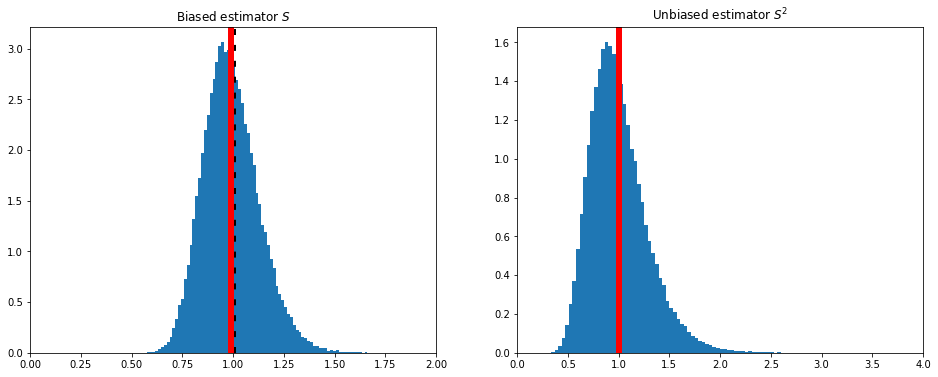

In [10]:
m = 100000
n = 100
X = stats.expon.rvs(size = m*n).reshape((m,n)) # Draw the random data.
S = np.std(X, axis = 1, ddof = 1) # Compute the sample standard deviation.
S2 = S**2 # Get the sample variance.

# Get the means of the sampling distributions.
ES = np.mean(S)
ES2 = np.mean(S2)

# Plot results.
fig, ax = plt.subplots(1,2,figsize = (16,6))
ax[0].hist(S, density = True, bins = 100)
ax[0].axvline(1, color = 'k', ls = ':', lw = 6, label = r'$\sigma = 1$')
ax[0].axvline(ES, color = 'r', lw = 6)
ax[0].set_xlim([0,2])
ax[0].set_title(r'Biased estimator $S$')

ax[1].hist(S2, density = True, bins = 100)
ax[1].axvline(1, color = 'k', ls = ':', lw = 6, label = r'$\sigma^2 = 1$')
ax[1].axvline(ES2, color = 'r', lw = 6)
ax[1].set_xlim([0,4])
ax[1].set_title(r'Unbiased estimator $S^2$');

## Standard error

The standard error of an estimator is the standard deviation of its sampling distribution.  Standard errors are extremely useful for uncertainty quantification when determining confidence intervals.  They tell us how much variability there is in our estimator.  Estimators with smaller standard errors are preferred.  If two estimators are unbiased, then the better estimator is the one with the smaller standard error.

Consider the problem of estimating the parameter $\theta$ of a normal distribution $N(\theta, 1)$ given data $X_1,\ldots,X_n$.  In this example, $\theta$ is the mean of the distribution.  But for a normal distribution the mean is the same as the median.  So should we estimate $\theta$ using the sample mean or the sample median?  Both estimators are unbiased, so the best way to answer this question is to compare their standard errors.  The sampling distributions are shown below when $n = 3$ and $\theta = 0$.

Std. Err. of Sample Mean   = 0.18
Std. Err. of Sample Median = 0.22


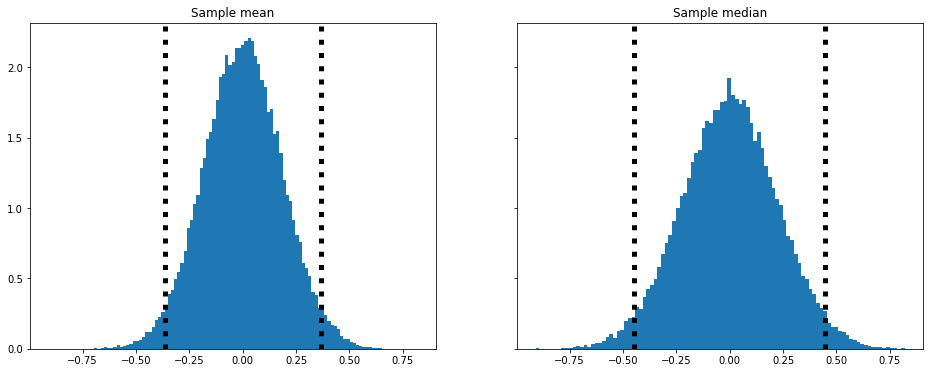

In [11]:
m = 50000
n = 30
X = np.random.randn(m*n).reshape((m,n)) # Draw the data
Xbar = np.mean(X, axis = 1) # Sample mean
Xmed = np.median(X, axis = 1) # Sample median

# Compute standard errors
Xbar_se = np.std(Xbar, ddof = 1)
Xmed_se = np.std(Xmed, ddof = 1)

print("Std. Err. of Sample Mean   = {:0.2f}".format(Xbar_se))
print("Std. Err. of Sample Median = {:0.2f}".format(Xmed_se))

fig, ax = plt.subplots(1,2,figsize = (16,6),sharex = True, sharey = True)
ax[0].hist(Xbar, density = True, bins = 100)
ax[0].axvline(np.mean(Xbar) - 2*Xbar_se, color = 'k', lw = 5, ls = ':')
ax[0].axvline(np.mean(Xbar) + 2*Xbar_se, color = 'k', lw = 5, ls = ':')
ax[0].set_title('Sample mean')

ax[1].hist(Xmed, density = True, bins = 100)
ax[1].axvline(np.mean(Xmed) - 2*Xmed_se, color = 'k', lw = 5, ls = ':')
ax[1].axvline(np.mean(Xmed) + 2*Xmed_se, color = 'k', lw = 5, ls = ':')
ax[1].set_title('Sample median');

## Mean squared error

The mean squared error is the sum of the bias squared and the variance

$$
    \text{MSE} = \text{bias}^2 + \text{variance}
$$

The estimator with the lowest MSE may not necessarily be unbiased!

# How to find estimators

So far we've seen a few estimators as well as some properties that are nice for them to have.  But we still haven't discussed systemic ways to find estimators.

## Plug-in estimators

Plug-in estimators are non-parametric estimators that are obtained by replacing the true and unknown distibution with the known empirical distribution of data.  We won't discuss these estimators in this class, but you've already seen several examples:

1. The sample mean
2. The sample standard deviation and variance
3. The sample median


## Optimization

Another extremely common approach to finding estimators is to select them by optimizing some criteria.  The theory here is pretty deep and if you're really curious you can look-up *M-estimators*.  Optimization is used extensively in modern statistics, especially machine learning where one has to train a huge neural network.  Two basic types of estimators that we'll cover in this class are

1. Method of moments estimators
2. Maximum likelihood estimators

# Method of moments

Method of moments derives an estimator $\hat{\theta}$ by finding the parameter that best matches the sample (i.e. empirical) moments with the population (i.e. true) moments.  In particular, the method of moments estimator $\hat{\theta}$ is the random variable that matches the means, the second moments, and so on

$$
    \alpha_k(\hat{\theta}) = \frac{1}{n}\sum_{i=1}^n X_i^k, \qquad \alpha_k(\theta) = E[X^k],\quad k = 1,2,\ldots
$$

To do this one has to be able to compute the moments of the distribution $E[X^k]$ in terms of the parameter of interest $\theta$.  At first this doesn't look like an optimization problem, but one can equivalently write this as

$$
\hat{\theta}(x_1,\ldots,x_n) = \underset{\theta}{\text{argmin}}\ \sum_{k=1}^K \left( \alpha_k(\theta) - \frac{1}{n}\sum_{i=1}^n x_i^k \right)^2
$$

which will have a minimum value of $0$ whenever a solution exists and the minimizer will be the method of moments estimate.

For example consider estimating the parameters $\alpha,\beta$ of a Uniform$(a,b)$ distribution.  There are 2 parameters so we will need to use the first two moments.  The mean and variance of the uniform distribution are

$$
    E[X] = \frac{a+b}{2}, \qquad \text{Var}[X] = \frac{(b-a)^2}{12}
$$

We could derive this by hand, but it's a bit tedious.  The analytic solution for the method of moments estimators are

$$
    \hat{a} = M_1 - \sqrt{3 (M_2 - M_1^2) }, \qquad \hat{b} = M_1 + \sqrt{3(M_2 - M_1)^2}
$$

where 

$$
    M_k = \frac{1}{n} \sum_{i=1}^n X_i^k, \quad k = 1,2
$$

We'll try solving an optimization problem and compare our answer with the analytic solution when $a = 0$ and $b=1$.

In [10]:
# Two helper functions to compute the difference squared between sample and population moments.
m1 = lambda ab, x1: ((ab[0] + ab[1])/2 - x1)**2 # First moment
m2 = lambda ab, x2: ((ab[1] - ab[0])**2 / 12 + ((ab[0] + ab[1])/2)**2 - x2)**2 # Second moment

# Draw a sample of data.
X = np.random.rand(5000)
X1 = np.mean(X) # First sample moment
X2 = np.mean(X**2) # Second sample moment

# Set up the objective function.
obj = lambda ab: m1(ab, X1) + m2(ab, X2)

result = minimize(obj, x0 = np.array([0.25, 1.5]))
ab = result.x

print("Optimization Solution")
print("a = {:0.3f}".format(ab[0]))
print("b = {:0.3f}".format(ab[1]))
print("\n")
print("Analytic Solution")
print("a = {:0.3f}".format(X1 - np.sqrt(3*(X2 - X1**2))))
print("b = {:0.3f}".format(X1 + np.sqrt(3*(X2 - X1**2))))

Optimization Solution
a = 0.003
b = 1.005


Analytic Solution
a = 0.003
b = 1.005


Optimization is a very wide and developed field and so it can be a powerful tool for statistical estimation.  There is actually an extension of method of moments called the Generalized Method of Moments (abbv. GMM), which is used all the time in econometrics as well as other disciplines.  The generalized method of moments is extremely flexible in allowing a wider variety of objective functions and works in a similar way to the example we have just seen.  Unfortunately, it's beyond the scope of this class.

# Maximum likelihood

Another way to derive estimators, where the role of optimization is more straightforward, is through maximum likelihood estimation.  The maximum likelihood estimator $\hat{\theta}$ is the choice of parameter that maximizes the joint density of the data (i.e. the likelihood function).  Typically, in practice, this is done by minimizing the log-likelihood 

$$
\hat{\theta}(x_1,\ldots,x_n) = \underset{\theta}{\text{argmin}}\ -\log f(x_1,\ldots,x_n; \theta)
$$

MLE can be used to fit any model as long as the joint density of the data can be fully specified.  For example, it can also be applied to problems where the data is not i.i.d. which happens in time series analysis.

In the example below, we'll compute the maximum likelihood estimates for the normal distribution where $\mu = 0$ and $\sigma=1$ and $\theta = (\mu,\sigma)$.

In [12]:
# Draw a random sample of data
n = 10000
X = np.random.randn(n)

# Define the negative log likelihood (scale by 1/n for better performance)
negLL = lambda theta: -np.sum(stats.norm.logpdf(X, loc = theta[0], scale = theta[1]))/n

# Compute the MLE
result = minimize(negLL, x0 = np.array([-1, 3]))
theta = result.x

print("Optimization Solution")
print("mu    = {:0.3f}".format(theta[0]))
print("sigma = {:0.3f}".format(theta[1]))
print("\n")
print("Analytic Solution")
print("mu    = {:0.3f}".format(np.mean(X)))
print("sigma = {:0.3f}".format(np.std(X)))

Optimization Solution
mu    = -0.000
sigma = 0.997


Analytic Solution
mu    = -0.000
sigma = 0.997
